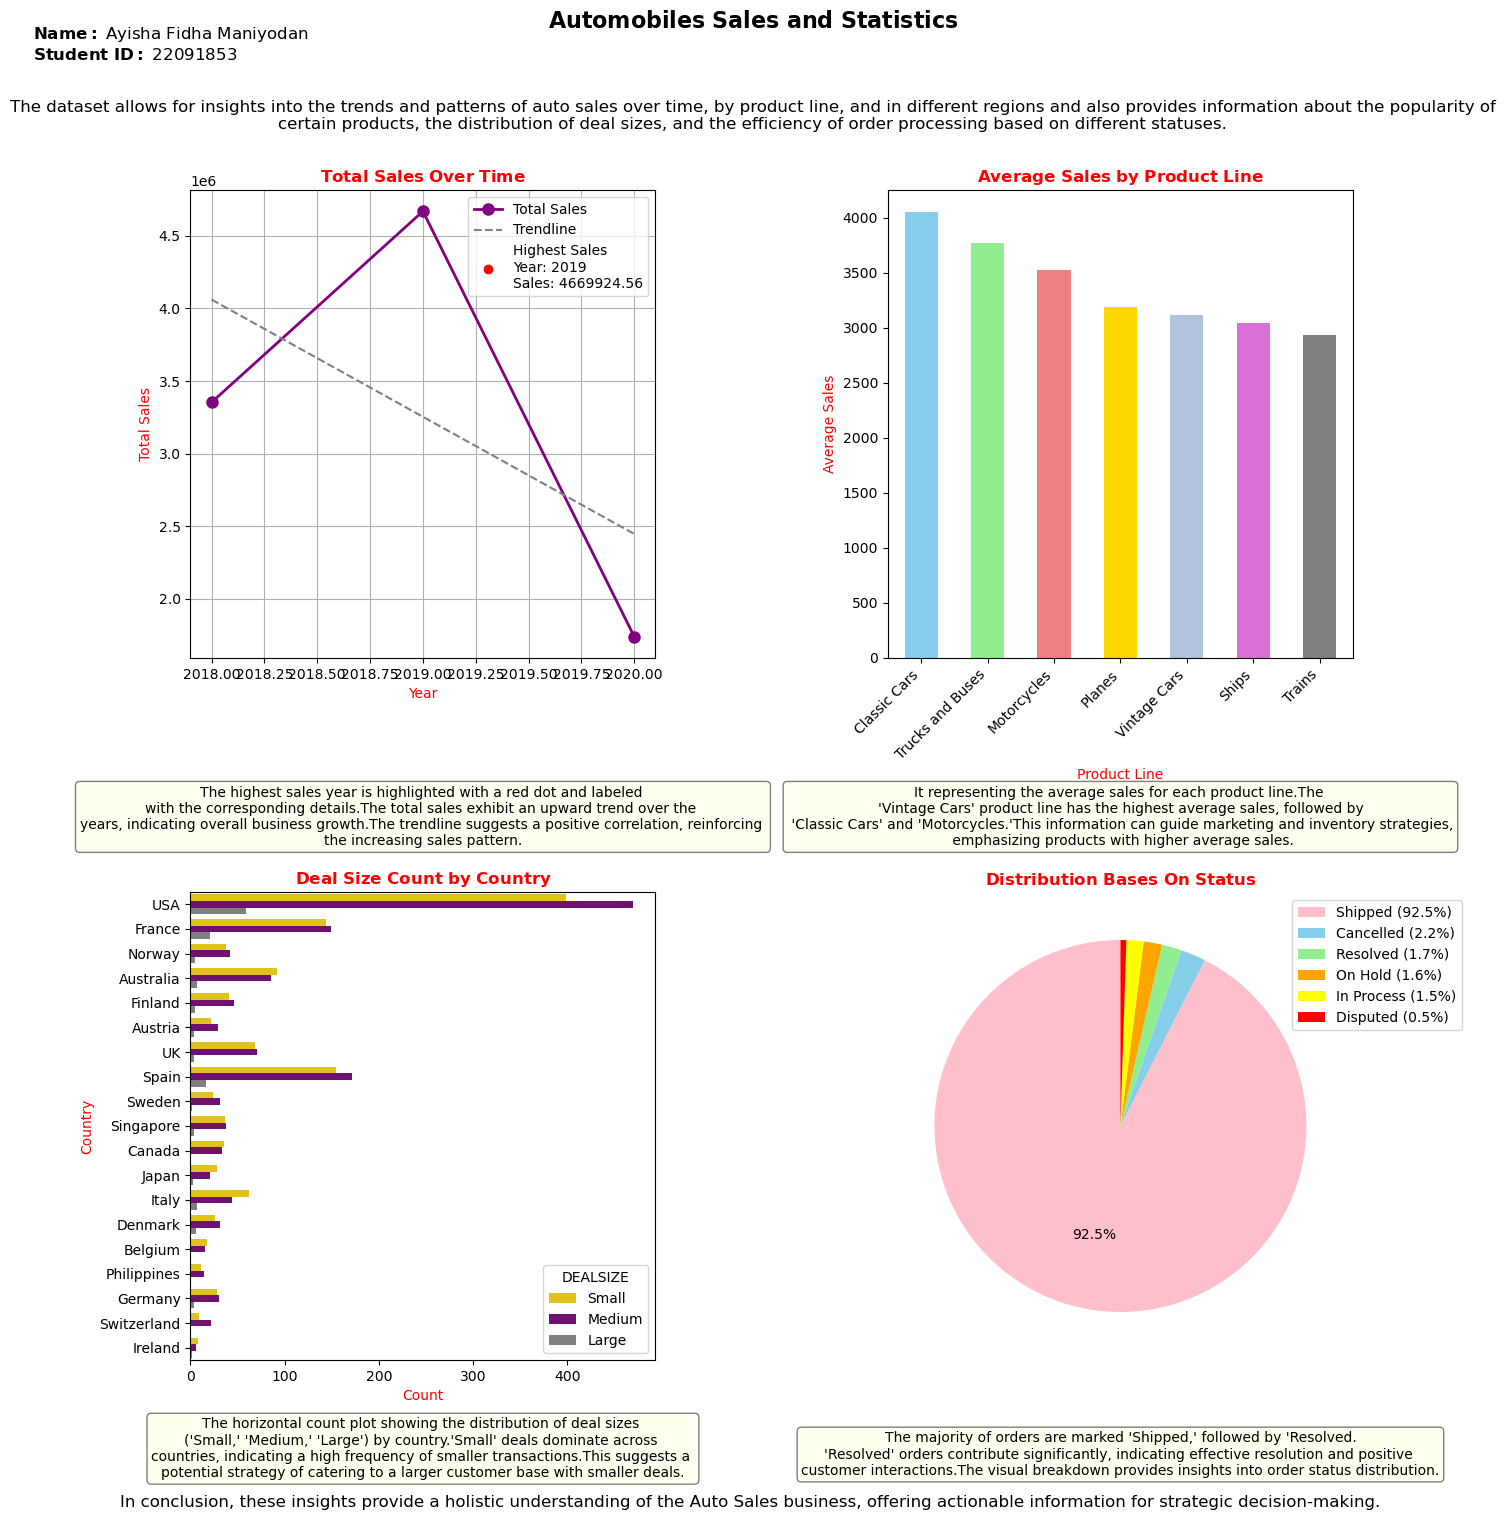

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Auto_Sales_data.csv")

# Display general summary statistics
summary_stats = df.describe()

# Create subplots with increased vertical space between the first two rows and increased horizontal space between the first two columns
fig, axs = plt.subplots(2, 2, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})  

# Add Name and Student ID more to the top left corner
fig.text(0.02, 0.99, r'$\bf{Name:}$ Ayisha Fidha Maniyodan' + '\n' + r'$\bf{Student\ ID:}$ 22091853', fontsize=12, va='top', ha='left')

# Add introductory text
intro_text = (
    "The dataset allows for insights into the trends and patterns of auto sales over time, by product line, and in different regions and also provides information "
    "about the popularity of certain products, the distribution of deal sizes, and the efficiency of order processing based on different statuses."
)

# Add more space above the intro_text
fig.text(0.5, 0.94, intro_text, ha='center', fontsize=12, va='top', wrap=True)

# Example 1: Line plot of total sales over time with additional details
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'],dayfirst=True)
df['Year'] = df['ORDERDATE'].dt.year

# Subplot 1: Line plot of total sales over time
plt.subplot(2, 2, 1)
sales_by_year = df.groupby('Year')['SALES'].sum()
sales_by_year.plot(marker='o', linestyle='-', color='purple', linewidth=2, markersize=8, label='Total Sales')

# Add a trendline using NumPy's polyfit
z = np.polyfit(sales_by_year.index, sales_by_year.values, 1)
p = np.poly1d(z)
plt.plot(sales_by_year.index, p(sales_by_year.index), linestyle='--', color='gray', label='Trendline')

max_sales_year = sales_by_year.idxmax()
max_sales_value = sales_by_year.max()
plt.scatter(max_sales_year, max_sales_value, color='red', label=f'Highest Sales\nYear: {max_sales_year}\nSales: {max_sales_value:.2f}')

plt.title(r'$\bf{Total\ Sales\ Over\ Time}$', color='red')
plt.xlabel('Year', color='red')
plt.ylabel('Total Sales', color='red')
plt.grid(True)
plt.legend()

# Add insight in a rounded box with light background color
insight_text_1 = (
    "The highest sales year is highlighted with a red dot and labeled \nwith the corresponding details."
    "The total sales exhibit an upward trend over the \nyears, indicating overall business growth."
    "The trendline suggests a positive correlation, reinforcing \nthe increasing sales pattern."
)

# Add insight as an annotation below the first graph
axs[0, 0].annotate(insight_text_1, xy=(0.5, -0.40), xycoords='axes fraction',
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5),
                   ha='center', fontsize=10, color='black')

# Subplot 2: Bar plot for average sales by product line
plt.subplot(2, 2, 2)
average_sales_by_product_line = df.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False)
average_sales_by_product_line.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightsteelblue', 'orchid', 'grey'])
plt.title(r'$\bf{Average\ Sales\ by\ Product\ Line}$', color='red')
plt.xlabel('Product Line', color='red')
plt.ylabel('Average Sales', color='red')
plt.xticks(rotation=45, ha='right')

# Add insight text below the second graph with a light background color
insight_text_2 = (
    "It representing the average sales for each product line."
    "The \n'Vintage Cars' product line has the highest average sales, followed by\n 'Classic Cars' and 'Motorcycles.'This information can guide marketing and inventory strategies,\n emphasizing products with higher average sales."
)

# Add insight as an annotation below the second graph
axs[0, 1].annotate(insight_text_2, xy=(0.5, -0.40), xycoords='axes fraction',
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5),
                   ha='center', fontsize=10, color='black')

# Subplot 3: Horizontal count plot of deal size by country
plt.subplot(2, 2, 3)
deal_size_palette = {'Small': 'gold', 'Medium': 'purple', 'Large': 'grey'}
sns.countplot(y='COUNTRY', hue='DEALSIZE', data=df, palette=deal_size_palette)
plt.title(r'$\bf{Deal\ Size\ Count\ by\ Country}$', color='red')
plt.xlabel('Count', color='red')
plt.ylabel('Country', color='red')

# Add insight text below the third graph with a light background color
insight_text_3 = (
    "The horizontal count plot showing the distribution of deal sizes \n('Small,' 'Medium,' 'Large') by country."
    "'Small' deals dominate across \ncountries, indicating a high frequency of smaller transactions."
    "This suggests a \npotential strategy of catering to a larger customer base with smaller deals."
)

# Add insight as an annotation below the third graph
axs[1, 0].annotate(insight_text_3, xy=(0.5, -0.25), xycoords='axes fraction',
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5),
                   ha='center', fontsize=10, color='black')

# Subplot 4: Pie chart based on STATUS
plt.subplot(2, 2, 4)
status_distribution = df['STATUS'].value_counts()
threshold = 5
autopct = lambda p: '{:.1f}%'.format(p) if p > threshold else ''
unique_colors = ['pink', 'skyblue', 'lightgreen', 'orange', 'yellow', 'red']
wedges, texts, autotexts = plt.pie(status_distribution, autopct=autopct, startangle=90, colors=unique_colors, labels=None)
legend_labels = status_distribution.index + ' (' + status_distribution.map(lambda x: f'{x / status_distribution.sum() * 100:.1f}%') + ')'
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title(r'$\bf{Distribution\ Bases\ On\ Status}$', color='red')

# Add insight text below the fourth graph with a light background color
insight_text_4 = (
    "The majority of orders are marked 'Shipped,' followed by 'Resolved.\n"
    "'Resolved' orders contribute significantly, indicating effective resolution and positive \ncustomer interactions."
    "The visual breakdown provides insights into order status distribution."
)

# Add insight as an annotation below the fourth graph
axs[1, 1].annotate(insight_text_4, xy=(0.5, -0.25), xycoords='axes fraction',
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5),
                   ha='center', fontsize=10, color='black')

# Add summary as text annotation
summary_text = (
    "In conclusion, these insights provide a holistic understanding of the Auto Sales business, offering actionable information for strategic decision-making. "
)

fig.suptitle(r'$\bf{Automobiles\ Sales\ and\ Statistics}$', y=1.0, fontsize=16)  # Bold title
fig.text(0.5, 0.01, summary_text, ha='center', fontsize=12, va='top', wrap=True)

# Add more space below summary_text
fig.subplots_adjust(bottom=0.1)

# Save the plot as an image
plt.savefig("22091853.png", dpi=300)

# Display the plot
plt.show()

